In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 9# enter the number of inside corners in x
ny = 6# enter the number of inside corners in y

objp  = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

In [2]:
objp.shape

(54, 3)

In [4]:
import matplotlib.pyplot as plt
import glob
import cv2
import pickle


objpoints =[]
imgpoints =[]
print ( " .. starting  ")

plt.axis('off')
i = 0
for fname in glob.glob("./camera_cal/*"):
#     print (name)\
    img = cv2.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        objpoints.append(objp)
        imgpoints.append(corners )


    i += 1
    plt.axis('off')
#     plt.imshow(img)
#     plt.show()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ) )    
print ( " .. completed .. saved into wide_dist_pickle.p  ")

 .. starting  
 .. completed .. saved into wide_dist_pickle.p  


In [5]:
# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
print ( " mtx.shape = " + str(mtx.shape) )

 mtx.shape = (3, 3)


## Working on test image

In [ ]:
test_image = cv2.imread("test_images/test1.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

### undistorting

In [28]:
undst = cv2.undistort(test_image, mtx, dist, None, mtx)


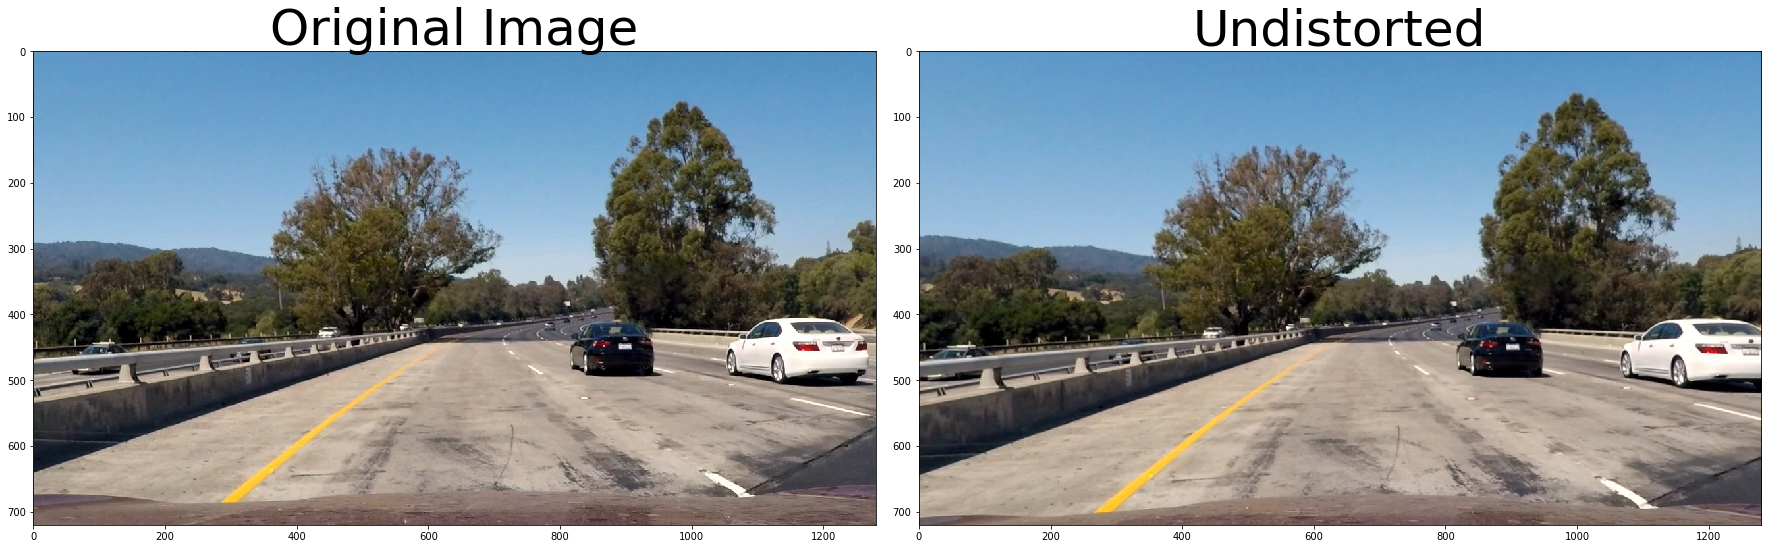

In [29]:
# top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(undst)
ax2.set_title('Undistorted', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### defining Sobel function

In [68]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == "x":
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobelx = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(sxbinary) # Remove this line
    return binary_output
    

## Gray image

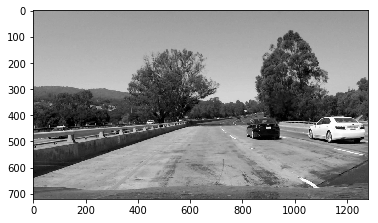

In [52]:
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap="gray")
plt.show()

In [53]:
# Calculating the median Value
median_value = np.average(gray_image)
print ( median_value)
#Canny edge detection parameters
low_threshold = 0.40*median_value
high_threshold = 1.33*median_value

print ("low_threshold={} , high_threshold={} ".format(low_threshold,high_threshold))

129.460603299
low_threshold=51.78424131944445 , high_threshold=172.1826023871528 


## Sobel

In [54]:
grad_binary = abs_sobel_thresh(test_image, orient='x', thresh_min=low_threshold, thresh_max=high_threshold)

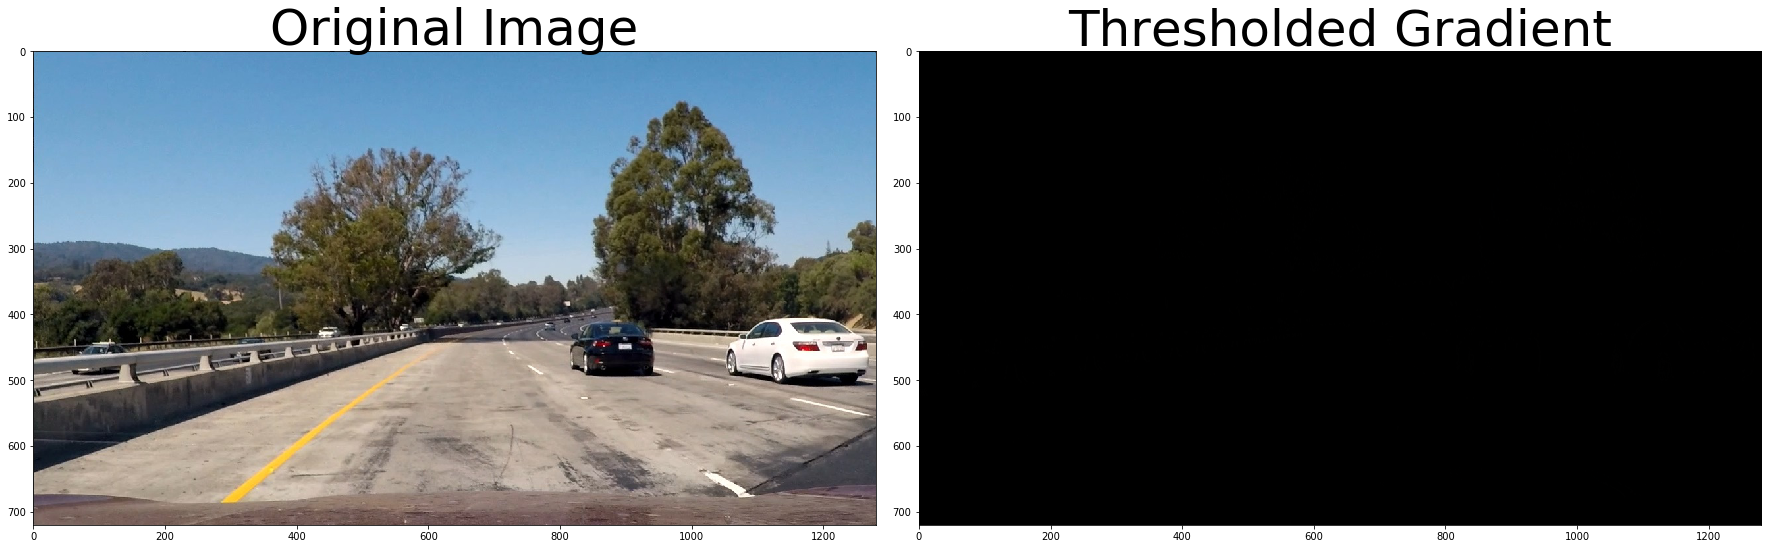

In [50]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Magnitude of gradient

In [55]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    gradmag = np.uint8(255*gradmag/np.max(gradmag))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    sxbinary = np.zeros_like(gradmag)
    sxbinary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(sxbinary) # Remove this line
    return binary_output
    

In [57]:
mag_binary = mag_thresh(gray_image, sobel_kernel=3, mag_thresh=(30, 100))


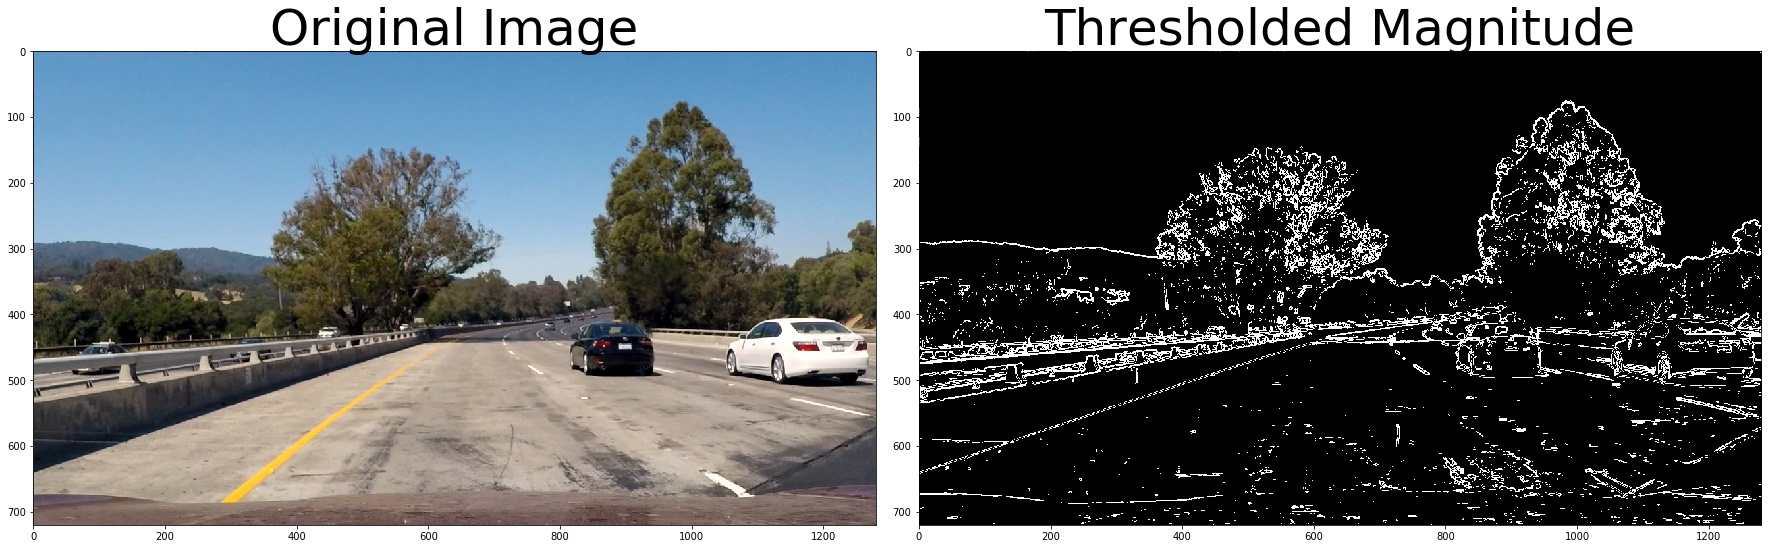

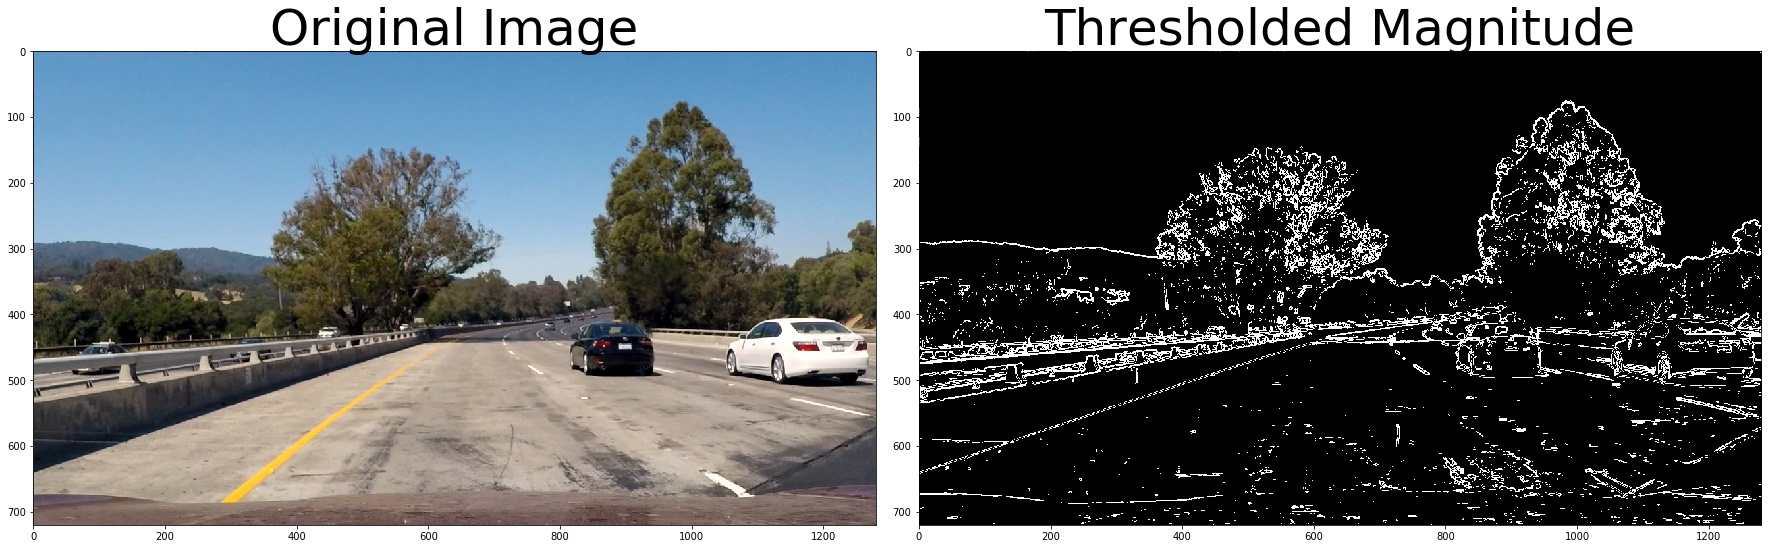

In [59]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### Direction of the gradient


In [61]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

In [62]:
dir_binary = dir_threshold(gray_image, sobel_kernel=15, thresh=(0.7, 1.3))


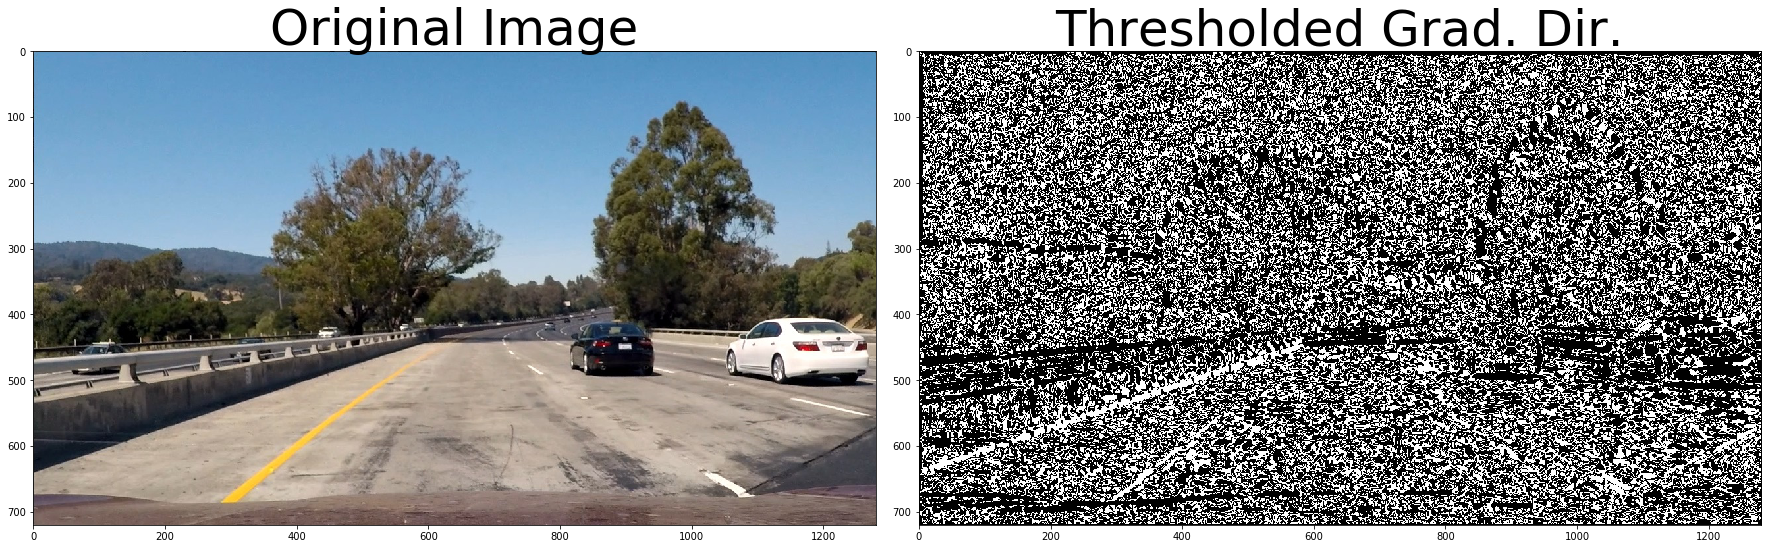

In [63]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Combining Thresholds

In [75]:
# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(gray_image, orient='x', sobel_kernel=ksize, thresh=(30, 100))
grady = abs_sobel_thresh(gray_image, orient='y', sobel_kernel=ksize, thresh=(30,100))
mag_binary = mag_thresh(gray_image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(gray_image, sobel_kernel=ksize, thresh=(0.7, 1.3))

In [76]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

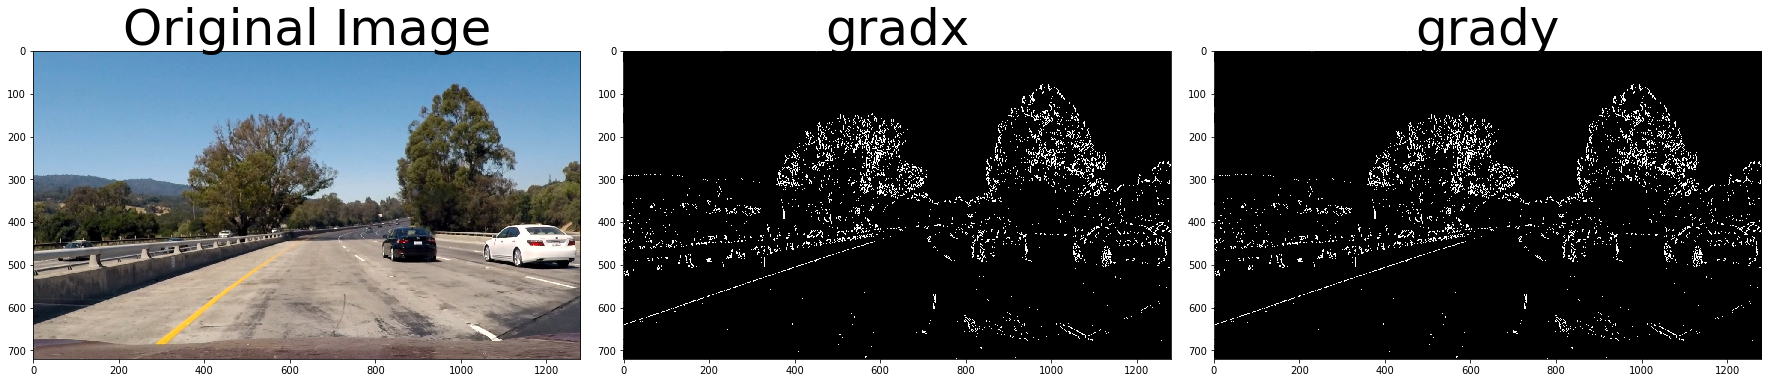

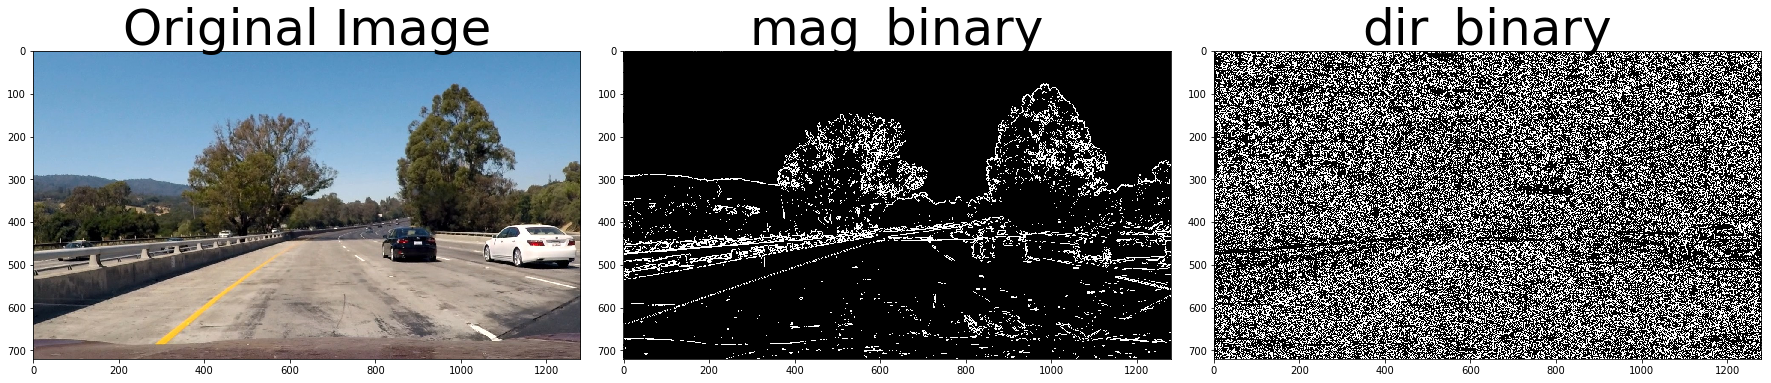

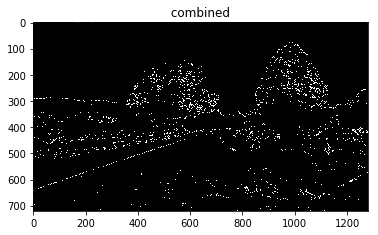

In [86]:
# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(gradx, cmap='gray')
ax2.set_title('gradx', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

ax3.imshow(gradx, cmap='gray')
ax3.set_title('grady',fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('mag_binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

ax3.imshow(dir_binary, cmap='gray')
ax3.set_title('dir_binary',fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.show()

plt.imshow(combined , cmap ="gray")
plt.title(" combined ")
plt.show()


np.pi/2

In [ ]:
### HLS

In [132]:
hls = cv2.cvtColor(test_image, cv2.COLOR_RGB2HLS)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]

In [134]:
s_channel.shape

(720, 1280)

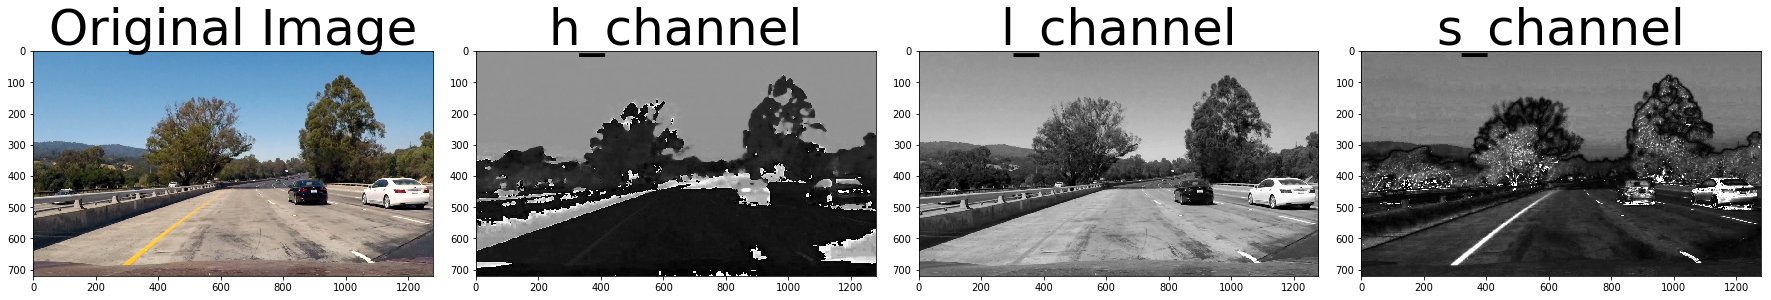

In [152]:
# Plot the result
f, (ax1, h_channel, l_channel, s_channel) = plt.subplots(1, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)

h_channel.imshow(hls[:,:,0], cmap='gray')
h_channel.set_title('h_channel', fontsize=50)

l_channel.imshow(hls[:,:,1], cmap='gray')
l_channel.set_title('l_channel', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

s_channel.imshow(hls[:,:,2], cmap='gray')
s_channel.set_title('s_channel',fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


In [135]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1


(720, 1280)

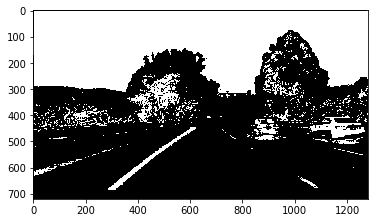

In [95]:
plt.imshow(binary, cmap="gray")
plt.show()

## Color and Gradient

In [123]:
# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))


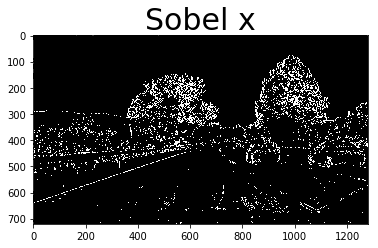

In [124]:
# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

plt.imshow(sxbinary, cmap="gray")
plt.title("Sobel x", fontsize=30)
plt.show()

In [138]:
# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

In [137]:
s_channel

array([[242, 100,  40, ..., 135, 115,  83],
       [100,  18,  49, ...,  74,  95, 223],
       [ 38,  49,  82, ...,  98,  92, 114],
       ..., 
       [ 13,  13,  21, ...,  37,  37,  32],
       [ 16,  13,  19, ...,  34,  33,  32],
       [ 21,  12,  16, ...,  38,  39,  53]], dtype=uint8)

In [146]:
# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

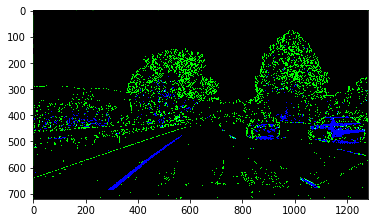

In [147]:
plt.imshow(color_binary)
plt.show()

In [148]:
# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

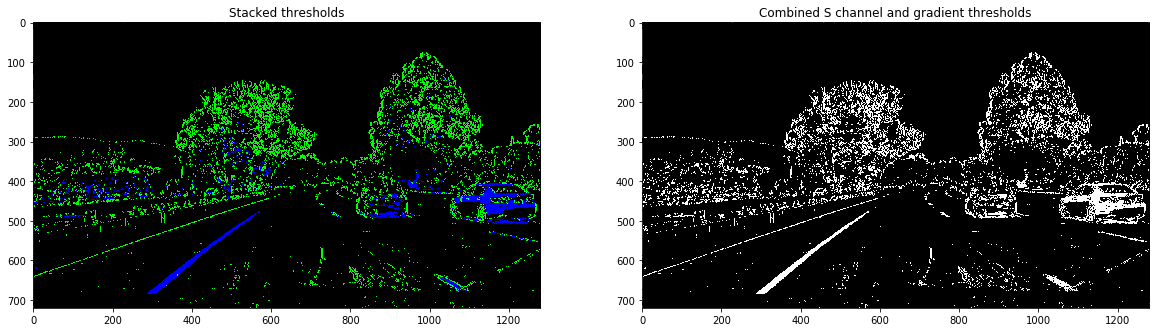

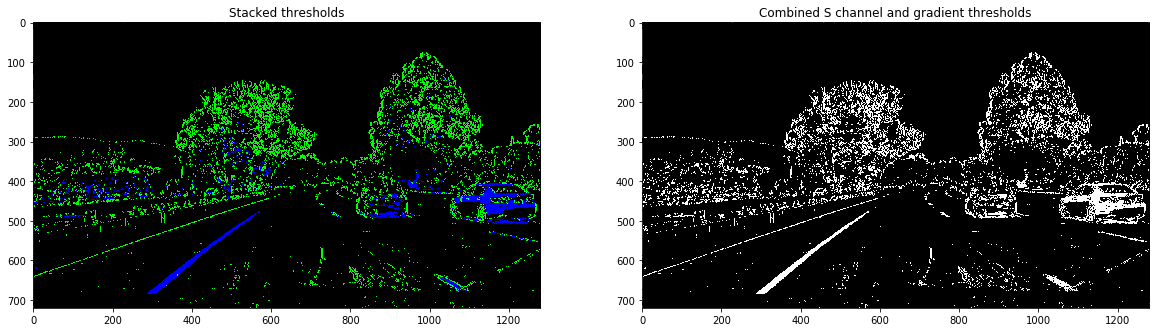

In [150]:
# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')
plt.show()

In [183]:
# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
#     combined_binary[(s_binary == 1) ] = 1
    combined_binary = combined_binary*255
    color_binary = np.dstack(( np.zeros_like(sxbinary), combined_binary, combined_binary)) * 255
    return combined_binary

In [184]:
result = pipeline(test_image)


In [ ]:
plt.imshow(result, cmap="gray")
plt.show()